#DD2358_Project

In [ ]:
import sys
!pip install psutil
!pip install gputil
!pip install line_profiler
!pip install memory-profiler

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=93ffdb4fcf6208e48a75d05b3e00089d3a9870b268f3725fb514d26619dfc822
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 15.0 MB/s eta 0:00:00


##Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from functools import wraps
from timeit import default_timer as timer
import torch
from mpl_toolkits.mplot3d import Axes3D
import numexpr as ne
import random
import statistics

##Decorators

In [ ]:
# decorator to time
def t_init(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        init_runtime.append(t2 - t1)
        return result
    return measure_time

def t_vec(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        vec_runtime.append(t2 - t1)
        return result
    return measure_time

def t_py(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        py_runtime.append(t2 - t1)
        return result
    return measure_time

In [ ]:
def t_init_3D(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        init3D_runtime.append(t2 - t1)
        return result
    return measure_time

def t_vec_3D(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        vec3D_runtime.append(t2 - t1)
        return result
    return measure_time

def t_py_3D(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        py3D_runtime.append(t2 - t1)
        return result
    return measure_time

##Initial code of Active Matter Simulation

To see the animation of the code, set 'plotRealTime' to 'True'

In [ ]:
@t_init
def init(Nt, N):					# Modifications we made to vary the parameters
	""" Finite Volume simulation """

	# Simulation parameters
	v0           = 1.0      # velocity
	eta          = 0.5      # random fluctuation in angle (in radians)
	L            = 10       # size of box
	R            = 1        # interaction radius
	dt           = 0.2      # time step
	# Nt         = 200      # number of time steps
	# N          = 500      # number of birds
	plotRealTime = False

	# Initialize
	np.random.seed(17)      # set the random number generator seed

	# bird positions
	x = np.random.rand(N,1)*L
	y = np.random.rand(N,1)*L

	# bird velocities
	theta = 2 * np.pi * np.random.rand(N,1)
	vx = v0 * np.cos(theta)
	vy = v0 * np.sin(theta)

	# Prep figure
	if plotRealTime:
		fig = plt.figure(figsize=(4,4), dpi=80)
		ax = plt.gca()

	# Simulation Main Loop
	for i in range(Nt):

		# move
		x += vx*dt
		y += vy*dt

		# apply periodic BCs
		x = x % L
		y = y % L

		# find mean angle of neighbors within R
		mean_theta = theta
		for b in range(N):
			neighbors = (x-x[b])**2+(y-y[b])**2 < R**2
			sx = np.sum(np.cos(theta[neighbors]))
			sy = np.sum(np.sin(theta[neighbors]))
			mean_theta[b] = np.arctan2(sy, sx)

		# add random perturbations
		theta = mean_theta + eta*(np.random.rand(N,1)-0.5)

		# update velocities
		vx = v0 * np.cos(theta)
		vy = v0 * np.sin(theta)

		# plot in real time
		if plotRealTime:
			plt.cla()
			plt.quiver(x,y,vx,vy)
			ax.set(xlim=(0, L), ylim=(0, L))
			ax.set_aspect('equal')
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			plt.pause(0.001)

	if plotRealTime:
		plt.savefig('activematter.png',dpi=240)
		plt.show()

	return 0

Mean execution of Initial implementation: 2.889755620956421 seconds

Standard deviation of Initial implementation: 0.3983950185457525 seconds



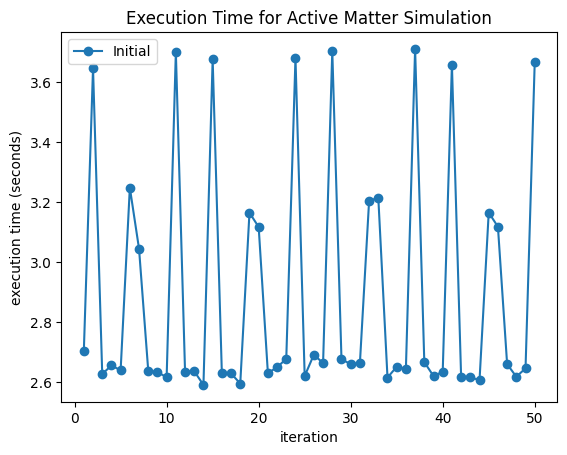

In [ ]:
# Initialize lists for the decorators
init_runtime = []

# Execute for 50 iterations and compute the mean runtime
for i in range(50):
  init(200, 500)        # we have modified the provided code to experiment

print(f"Mean execution of Initial implementation: {sum(init_runtime)/len(init_runtime)} seconds")
print()
print(f"Standard deviation of Initial implementation: {statistics.stdev(init_runtime)} seconds")
print()

# Plotting
plt.figure()
plt.plot(range(1, 51), init_runtime, marker='o', label='Initial')

plt.xlabel('iteration')
plt.ylabel('execution time (seconds)')
plt.title('Execution Time for Active Matter Simulation')
plt.legend()
plt.savefig('init_time_runs.png')
plt.show()

####How does the number of birds affect the performance of the initial code?

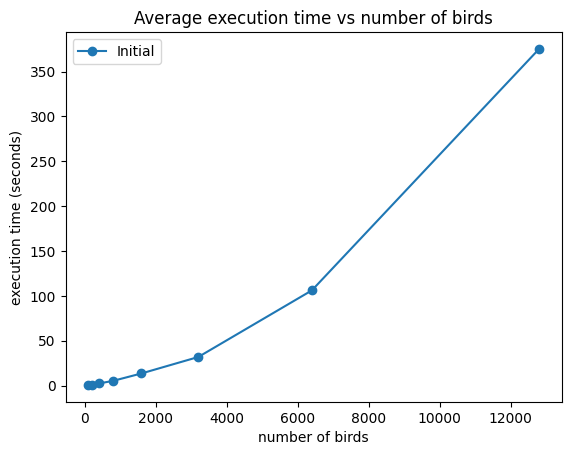

In [ ]:
# Initialize lists for the decorators
mean_runtime_init = []
mean_std = []

N_values = []

Nt = 200 # number of time steps
N = 100  # number of birds

for i in range(8):
  init_runtime = []
  for j in range(5):   # execute for 5 iterations and compute the mean runtime
    init(Nt, N)

  mean_runtime_init.append(sum(init_runtime)/len(init_runtime))  # calculate the average runtime every 5 iterations
  mean_std.append(statistics.stdev(init_runtime))
  N *= 2                                                         # double the number of birds

N_values = [100 * 2**i for i in range(8)]

# Plotting
plt.figure()
plt.plot(N_values, mean_runtime_init, marker='o', label='Initial')

plt.xlabel('number of birds')
plt.ylabel('execution time (seconds)')
plt.title('Average execution time vs number of birds')
plt.legend()
plt.savefig('runtime_ft_N.png')
plt.show()

In [ ]:
print(mean_runtime_init)
print(mean_std)

[0.6761674365999966, 0.9425952367999798, 2.2740308448000066, 5.198131817600017, 13.471645552000018, 31.799956300999998, 106.06659357820001, 375.19684666399996]
[0.1957853787292487, 0.008998058585318982, 0.5994305571856468, 0.8292761455530521, 0.5185809256617451, 0.8130859699605038, 1.9155724234226226, 2.7472544053912635]


##Code of Active Matter Simulation after ***first*** optimization step

In [ ]:
@t_vec
def vectorized(Nt, N):
	""" Finite Volume simulation """

	# Simulation parameters
	v0           = 1.0      # velocity
	eta          = 0.5      # random fluctuation in angle (in radians)
	L            = 10       # size of box
	R            = 1        # interaction radius
	dt           = 0.2      # time step
	# Nt         = 200      # number of time steps
	# N          = 500      # number of birds
	plotRealTime = False

	# Initialize
	np.random.seed(17)      # set the random number generator seed

	# bird positions
	x = np.random.rand(N,1)*L
	y = np.random.rand(N,1)*L

	# bird velocities
	theta = 2 * np.pi * np.random.rand(N,1)
	vx = v0 * np.cos(theta)
	vy = v0 * np.sin(theta)

  # Prep figure
	if plotRealTime:
		fig = plt.figure(figsize=(4,4), dpi=80)
		ax = plt.gca()

	# Simulation Main Loop
	for i in range(Nt):

		# move
		x += vx*dt
		y += vy*dt

		# apply periodic BCs
		x = x % L
		y = y % L

		# find mean angle of neighbors within R
		x_diff = np.expand_dims(x, axis=1) - x
		y_diff = np.expand_dims(y, axis=1) - y
		neighbors = (x_diff**2 + y_diff**2) < R**2
		sx = np.sum(np.cos(theta) * neighbors, axis=1)
		sy = np.sum(np.sin(theta) * neighbors, axis=1)
		mean_theta = np.arctan2(sy, sx)

		# add random perturbations
		theta = mean_theta + eta*(np.random.rand(N,1)-0.5)

		# update velocities
		vx = v0 * np.cos(theta)
		vy = v0 * np.sin(theta)

		# plot in real time
		if plotRealTime:
			plt.cla()
			plt.quiver(x,y,vx,vy)
			ax.set(xlim=(0, L), ylim=(0, L))
			ax.set_aspect('equal')
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			plt.pause(0.001)

	if plotRealTime:
		plt.savefig('activematter.png',dpi=240)
		plt.show()

	return 0

##Code of Active Matter Simulation after ***second*** optimization step

In [ ]:
@t_py
def pytorch(Nt, N):
  """ Finite Volume simulation """

  # Simulation parameters
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  v0 = 1.0      # velocity
  eta = 0.5     # random fluctuation in angle (in radians)
  L = 10        # size of box
  R = 1         # interaction radius
  dt = 0.2      # time step
  # Nt = 200      # number of time steps
  # N = 500       # number of birds
  plotRealTime = False

  # Initialize
  torch.manual_seed(17)  # set the random number generator seed

  # bird positions
  x = torch.rand(N, 1).to(device) * L
  y = torch.rand(N, 1).to(device) * L

  # bird velocities
  theta = 2 * torch.pi * torch.rand(N, 1).to(device)
  vx = v0 * torch.cos(theta)
  vy = v0 * torch.sin(theta)

  # Prep figure
  if plotRealTime:
    fig = plt.figure(figsize=(4,4), dpi=80)
    ax = plt.gca()

  # Simulation Main Loop
  for i in range(Nt):

    # move
    x += vx * dt
    y += vy * dt

    # apply periodic BCs
    x = x % L
    y = y % L

    # find mean angle of neighbors within R
    x_diff = x.unsqueeze(1) - x
    y_diff = y.unsqueeze(1) - y
    neighbors = (x_diff**2 + y_diff**2) < R**2
    sx = torch.sum(torch.cos(theta) * neighbors, dim=1)
    sy = torch.sum(torch.sin(theta) * neighbors, dim=1)
    mean_theta = torch.atan2(sy, sx)

    # add random perturbations
    theta = mean_theta + eta * (torch.rand(N, 1).to(device) - 0.5)

    # update velocities
    vx = v0 * torch.cos(theta)
    vy = v0 * torch.sin(theta)

    # plot in real time
    if plotRealTime:
      plt.cla()
      plt.quiver(x,y,vx,vy)
      ax.set(xlim=(0, L), ylim=(0, L))
      ax.set_aspect('equal')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      plt.pause(0.001)

  if plotRealTime:
    plt.savefig('activematter.png',dpi=240)
    plt.show()

  return 0

##Performance measurements

Mean execution of Initial implementation: 2.8074356603622435 seconds
Mean execution of Vectorized implementation: 0.47596134185791017 seconds
Mean execution of PyTorch implementation: 0.07068418979644775 seconds

Standard deviation of Initial implementation: 0.4734501787544171 seconds
Standard deviation of Vectorized implementation: 0.08112756391405807 seconds
Standard deviation of PyTorch implementation: 0.013391154791768585 seconds



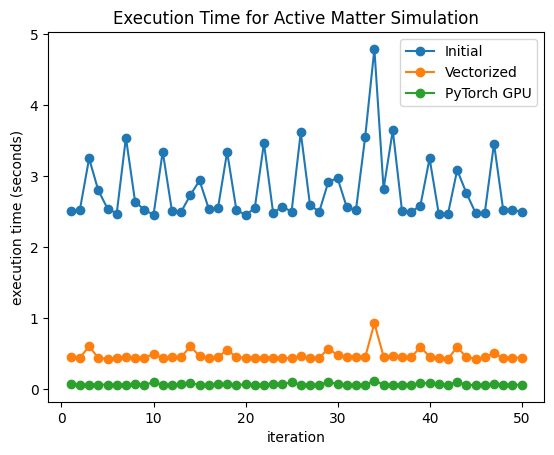

In [ ]:
# Initialize lists for the decorators
init_runtime = []
vec_runtime = []
py_runtime = []

# Execute for 50 iterations and compute the mean runtime
for i in range(50):
  init(200, 500)        # we have modified the provided code to experiment
  vectorized(200, 500)  # with different values of the factors that affect the performance
  pytorch(200, 500)     # Here, we use the default values

print(f"Mean execution of Initial implementation: {sum(init_runtime)/len(init_runtime)} seconds")
print(f"Mean execution of Vectorized implementation: {sum(vec_runtime)/len(vec_runtime)} seconds")
print(f"Mean execution of PyTorch implementation: {sum(py_runtime)/len(py_runtime)} seconds")
print()
print(f"Standard deviation of Initial implementation: {statistics.stdev(init_runtime)} seconds")
print(f"Standard deviation of Vectorized implementation: {statistics.stdev(vec_runtime)} seconds")
print(f"Standard deviation of PyTorch implementation: {statistics.stdev(py_runtime)} seconds")
print()

# Plotting
plt.figure()
plt.plot(range(1, 51), init_runtime, marker='o', label='Initial')
plt.plot(range(1, 51), vec_runtime, marker='o', label='Vectorized')
plt.plot(range(1, 51), py_runtime, marker='o', label='PyTorch GPU')

plt.xlabel('iteration')
plt.ylabel('execution time (seconds)')
plt.title('Execution Time for Active Matter Simulation')
plt.legend()
plt.savefig('exec_time.png')
plt.show()

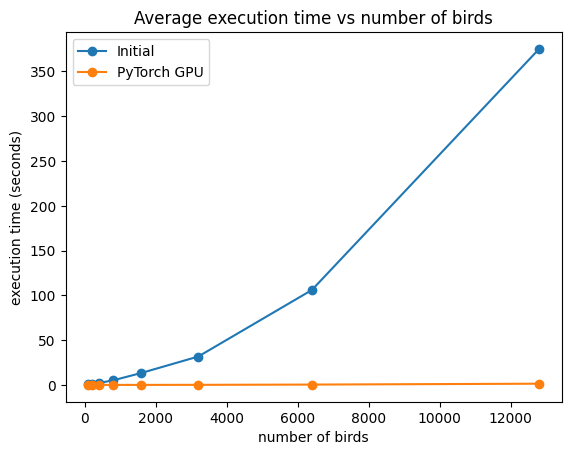

In [ ]:
# Initialize lists for the decorators
init_runtime = []
py_runtime = []
mean_runtime_init = []
mean_runtime_py = []

N_values = []

Nt = 200 # number of time steps
N = 100  # number of birds

for i in range(8):
  for j in range(5):   # execute for 5 iterations and compute the mean runtime
    init(Nt, N)
    pytorch(Nt, N)

  mean_runtime_init.append(sum(init_runtime)/len(init_runtime))  # calculate the average runtime every 5 iterations
  mean_runtime_py.append(sum(py_runtime)/len(py_runtime))
  N *= 2                                                         # double the number of birds

N_values = [100 * 2**i for i in range(8)]

# Plotting
plt.figure()
plt.plot(N_values, mean_runtime_init, marker='o', label='Initial')
plt.plot(N_values, mean_runtime_py, marker='o', label='PyTorch GPU')

plt.xlabel('number of birds')
plt.ylabel('execution time (seconds)')
plt.title('Average execution time vs number of birds')
plt.legend()
plt.savefig('runtime_ft_N_comparison.png')
plt.show()

##Varying factors

###Number of time steps Nt

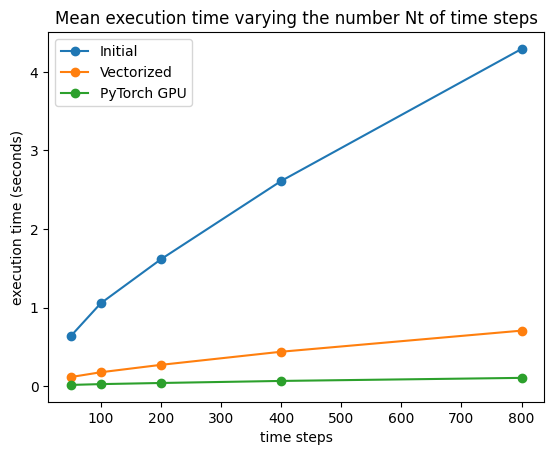

In [ ]:
# Initialize lists for the decorators
init_runtime = []
vec_runtime = []
py_runtime = []

mean_runtime_init = []
mean_runtime_vec = []
mean_runtime_py = []

num_of_time_steps = [50, 100, 200, 400, 800]

# Execute for 10 iterations and compute the mean runtime
for Nt in num_of_time_steps:
  for i in range(10):
    init(Nt, 500)       # we use the default value of the number of birds equal to 500
    vectorized(Nt, 500)
    pytorch(Nt, 500)

  mean_runtime_init.append(sum(init_runtime)/len(init_runtime))   # calculate mean runtime
  mean_runtime_vec.append(sum(vec_runtime)/len(vec_runtime))      # for each value of time steps
  mean_runtime_py.append(sum(py_runtime)/len(py_runtime))

# Plotting
plt.figure()
plt.plot(num_of_time_steps, mean_runtime_init, marker='o', label='Initial')
plt.plot(num_of_time_steps, mean_runtime_vec, marker='o', label='Vectorized')
plt.plot(num_of_time_steps, mean_runtime_py, marker='o', label='PyTorch GPU')

plt.xlabel('time steps')
plt.ylabel('execution time (seconds)')
plt.title('Mean execution time varying the number Nt of time steps')
plt.legend()
plt.savefig('exec_time_ft_Nt.png')
plt.show()

###Number of birds N

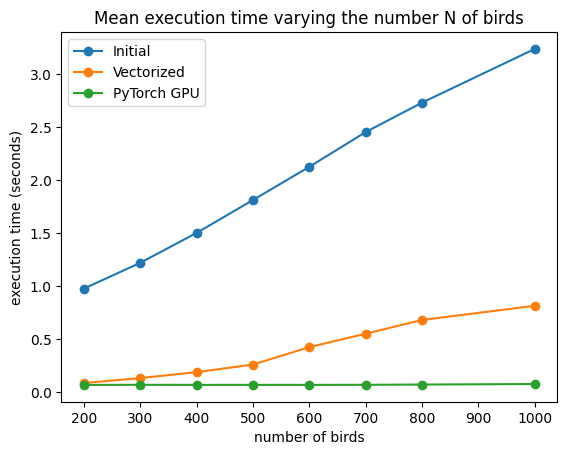

In [ ]:
# Initialize lists for the decorators
init_runtime = []
vec_runtime = []
py_runtime = []

mean_runtime_init = []
mean_runtime_vec = []
mean_runtime_py = []

num_of_birds = [200, 300, 400, 500, 600, 700, 800, 1000]

for N in num_of_birds:
  for i in range(10):   # execute for 10 iterations and compute the mean runtime
    init(200, N)
    vectorized(200, N)
    pytorch(200, N)

  mean_runtime_init.append(sum(init_runtime)/len(init_runtime))    # calculate mean runtime for each number N of birds
  mean_runtime_vec.append(sum(vec_runtime)/len(vec_runtime))
  mean_runtime_py.append(sum(py_runtime)/len(py_runtime))

# Plotting
plt.figure()
plt.plot(num_of_birds, mean_runtime_init, marker='o', label='Initial')
plt.plot(num_of_birds, mean_runtime_vec, marker='o', label='Vectorized')
plt.plot(num_of_birds, mean_runtime_py, marker='o', label='PyTorch GPU')

plt.xlabel('number of birds')
plt.ylabel('execution time (seconds)')
plt.title('Mean execution time varying the number N of birds')
plt.legend()
plt.savefig('exec_time_ft_N.png')
plt.show()

##Profiling

**To execute the profiler, we need to erase the decorators! Replace "@" with "#" and execute the corresponding cell.**

In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f init init(200, 500)

In [ ]:
%lprun -f vectorized vectorized(200, 500)

In [ ]:
%load_ext memory_profiler

In [ ]:
%memit init(200, 500)

peak memory: 401.75 MiB, increment: 0.42 MiB


In [ ]:
%memit vectorized(200, 500)

peak memory: 410.75 MiB, increment: 8.84 MiB


GPU Memory Usage based on this https://github.com/anderskm/gputil

In [ ]:
import GPUtil
from threading import Thread
import time

py_runtime = []

class Monitor(Thread):
    def __init__(self, delay):
        super(Monitor, self).__init__()
        self.stopped = False
        self.delay = delay # Time between calls to GPUtil
        self.start()

    def run(self):
        while not self.stopped:
            gpus = GPUtil.getGPUs()
            GPUtil.showUtilization()
            print()
            for i, gpu in enumerate(gpus):
              print(f"Name: {gpu.name}")
              print(f"GPU ID: {gpu.id}")
              print(f"GPU Memory Used: {gpu.memoryUsed} MB")
              print(f"GPU Memory Utilization: {gpu.memoryUtil * 100}%")
              print(f"GPU Load: {gpu.load * 100}%")
              print()
            time.sleep(self.delay)

    def stop(self):
        self.stopped = True

# Instantiate monitor with a 1-second delay between updates
monitor = Monitor(1)

pytorch(200, 500)

# Close monitor
monitor.stop()

| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |

Name: Tesla T4
GPU ID: 0
GPU Memory Used: 125.0 MB
GPU Memory Utilization: 0.8138020833333334%
GPU Load: 0.0%



##3D Extension

###Initial code of Active Matter Simulation in 3D space

In [ ]:
@t_init_3D
def init_3D(Nt, N):
  """ Finite Volume simulation """

  # Simulation parameters
  v0 = 1.0      # velocity
  eta = 0.5     # random fluctuation in angle (in radians)
  L = 10        # size of box
  R = 1         # interaction radius
  dt = 0.2      # time step
  # Nt = 200      # number of time steps
  # N = 500       # number of birds
  plotRealTime = False  # change to 'True' to turn on animation

  # Initialize
  np.random.seed(17)      # set the random number generator seed

  # Bird positions
  x = np.random.rand(N, 1) * L
  y = np.random.rand(N, 1) * L
  z = np.random.rand(N, 1) * L  # Added for 3D simulation

  # Bird velocities
  theta = np.pi * np.random.rand(N, 1)  # Inclination angle
  phi = 2 * np.pi * np.random.rand(N, 1)  # Azimuthal angle

  vx = v0 * np.sin(theta) * np.cos(phi)
  vy = v0 * np.sin(theta) * np.sin(phi)
  vz = v0 * np.cos(theta)

  # Prep figure
  if plotRealTime:
    fig = plt.figure(figsize=(6, 6), dpi=80)
    ax = fig.add_subplot(111, projection='3d')

  # Simulation Main Loop
  for i in range(Nt):
    # Move
    x = x + vx * dt
    y = y + vy * dt
    z = z + vz * dt  # Update in the z-direction for 3D

    # Apply periodic BCs
    x = x % L
    y = y % L
    z = z % L

    # Find mean angle of neighbors within R
    mean_theta = theta
    mean_phi = phi
    for b in range(N):
      neighbors = (x-x[b])**2+(y-y[b])**2+(z-z[b])**2 < R**2
      sx_theta = np.sum(np.cos(theta[neighbors]))
      sy_theta = np.sum(np.sin(theta[neighbors]))
      sx_phi = np.sum(np.cos(phi[neighbors]))
      sy_phi = np.sum(np.sin(phi[neighbors]))
      mean_theta[b] = np.arctan2(sy_theta, sx_theta)
      mean_phi[b] = np.arctan2(sy_phi, sx_phi)

    # Add random perturbations to inclination (theta) and azimuthal (phi) angles
    theta = mean_theta + eta * (np.random.rand(N, 1) - 0.5)
    phi = mean_phi + eta * (np.random.rand(N, 1) - 0.5)

    # Update velocities
    vx = v0 * np.sin(theta) * np.cos(phi)
    vy = v0 * np.sin(theta) * np.sin(phi)
    vz = v0 * np.cos(theta)

    # Plot in real-time
    if plotRealTime:
      plt.cla()
      ax.quiver(x,y,z,vx,vy,vz)
      ax.set(xlim=(0, L), ylim=(0, L), zlim=(0,L))
      ax.set_aspect('equal')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax.get_zaxis().set_visible(False)
      plt.pause(0.001)

  # Save figure
  if plotRealTime:
    plt.savefig('activematter_3d.png', dpi=240)
    plt.show()

  return 0

###Vectorized code of Active Matter Simulation in 3D space

In [ ]:
@t_vec_3D
def vectorized_3D(Nt, N):
  """ Finite Volume simulation """

  # Simulation parameters
  v0 = 1.0      # velocity
  eta = 0.5     # random fluctuation in angle (in radians)
  L = 10        # size of box
  R = 1         # interaction radius
  dt = 0.2      # time step
  # Nt = 200      # number of time steps
  # N = 500       # number of birds
  plotRealTime = False

  # Initialize
  np.random.seed(17)  # set the random number generator seed

  # Bird positions
  x = np.random.rand(N) * L
  y = np.random.rand(N) * L
  z = np.random.rand(N) * L  # Added for 3D simulation

  # Bird velocities
  theta = np.pi * np.random.rand(N)  # Inclination angle
  phi = 2 * np.pi * np.random.rand(N)  # Azimuthal angle

  # Bird velocities in Cartesian coordinates
  vx = v0 * np.sin(theta) * np.cos(phi)
  vy = v0 * np.sin(theta) * np.sin(phi)
  vz = v0 * np.cos(theta)

  # Prep figure
  if plotRealTime:
    fig = plt.figure(figsize=(6, 6), dpi=80)
    ax = fig.add_subplot(111, projection='3d')

  # Simulation Main Loop
  for i in range(Nt):
    # Move and apply periodic BCs
    x = (x + vx * dt) % L
    y = (y + vy * dt) % L
    z = (z + vz * dt) % L

    # Calculate distances using broadcasting
    dx = x[:, np.newaxis] - x
    dy = y[:, np.newaxis] - y
    dz = z[:, np.newaxis] - z
    distances_squared = dx**2 + dy**2 + dz**2

    # Find mean angle of neighbors within R
    neighbors = distances_squared < R**2

    mean_theta = np.arctan2(np.sum(np.sin(theta) * neighbors, axis=1),
                            np.sum(np.cos(theta) * neighbors, axis=1))

    mean_phi = np.arctan2(np.sum(np.sin(phi) * neighbors, axis=1),
                          np.sum(np.cos(phi) * neighbors, axis=1))

    # Add random perturbations
    theta = mean_theta + eta * (np.random.rand(N) - 0.5)
    phi = mean_phi + eta * (np.random.rand(N) - 0.5)

    # Update velocities
    vx, vy, vz = v0 * np.array([np.sin(theta) * np.cos(phi),
                                  np.sin(theta) * np.sin(phi),
                                  np.cos(theta)])

    # Plot in real-time
    if plotRealTime:
      ax.cla()
      ax.quiver(x, y, z, vx, vy, vz, length=0.1, normalize=True)
      ax.set_xlim([0, L])
      ax.set_ylim([0, L])
      ax.set_zlim([0, L])
      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Z')
      plt.pause(0.001)

  # Save figure
  if plotRealTime:
    plt.savefig('activematter_3d.png', dpi=240)
    plt.show()

  return 0

###Optimized code for GPU utilization of Active Matter Simulation in 3D space

In [ ]:
@t_py_3D
def pytorch_3D(Nt, N):
  """ Finite Volume simulation """

  # Simulation parameters
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  v0 = 1.0      # velocity
  eta = 0.5     # random fluctuation in angle (in radians)
  L = 10        # size of box
  R = 1         # interaction radius
  dt = 0.2      # time step
  # Nt = 200      # number of time steps
  # N = 500       # number of birds
  plotRealTime = False

  # Initialize
  torch.manual_seed(17)  # set the random number generator seed

  # bird positions
  x = torch.rand(N, 1).to(device) * L
  y = torch.rand(N, 1).to(device) * L
  z = torch.rand(N, 1).to(device) * L

  # bird velocities
  theta = torch.pi * torch.rand(N, 1).to(device)
  phi = 2 * torch.pi * torch.rand(N, 1).to(device)

  vx = v0 * torch.sin(theta) * torch.cos(phi)
  vy = v0 * torch.sin(theta) * torch.sin(phi)
  vz = v0 * torch.cos(theta)

  # Prep figure
  if plotRealTime:
    fig = plt.figure(figsize=(6, 6), dpi=80)
    ax = fig.add_subplot(111, projection='3d')

  # Simulation Main Loop
  for i in range(Nt):
    # move
    x = x + vx * dt
    y = y + vy * dt
    z = z + vz * dt  # Update in the z-direction for 3D

    # apply periodic BCs
    x = x % L
    y = y % L
    z = z % L

    # find mean angle of neighbors within R
    x_diff = x.unsqueeze(1) - x
    y_diff = y.unsqueeze(1) - y
    z_diff = z.unsqueeze(1) - z
    neighbors = (x_diff**2 + y_diff**2 + z_diff**2) < R**2

    sx_theta = torch.sum(torch.cos(theta) * neighbors, dim=1)
    sy_theta = torch.sum(torch.sin(theta) * neighbors, dim=1)
    sx_phi = torch.sum(torch.cos(phi) * neighbors, dim=1)
    sy_phi = torch.sum(torch.sin(phi) * neighbors, dim=1)

    mean_theta = torch.atan2(sy_theta, sx_theta)
    mean_phi = torch.atan2(sy_phi, sx_phi)

    # add random perturbations
    theta = mean_theta + eta * (torch.rand(N, 1).to(device) - 0.5)
    phi = mean_phi + eta * (torch.rand(N, 1).to(device) - 0.5)

    # update velocities
    vx = v0 * torch.sin(theta) * torch.cos(phi)
    vy = v0 * torch.sin(theta) * torch.sin(phi)
    vz = v0 * torch.cos(theta)

    # Plot in real-time
    if plotRealTime:
      ax.cla()
      ax.quiver(x, y, z, vx, vy, vz, length=0.1, normalize=True)
      ax.set_xlim([0, L])
      ax.set_ylim([0, L])
      ax.set_zlim([0, L])
      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Z')
      plt.pause(0.001)

  # Save figure
  if plotRealTime:
    plt.savefig('activematter_3d.png', dpi=240)
    plt.show()

  return 0

Mean execution of Initial implementation in 3D space: 4.6893400957600075 seconds
Mean execution of Vectorized implementation in 3D space: 0.8433725654599584 seconds
Mean execution of PyTorch implementation in 3D space: 0.12518829455999367 seconds

Standard deviation of Initial implementation in 3D space: 1.053302191998 seconds
Standard deviation of Vectorized implementation in 3D space: 0.18791164133124572 seconds
Standard deviation of PyTorch implementation in 3D space: 0.02648701824614943 seconds



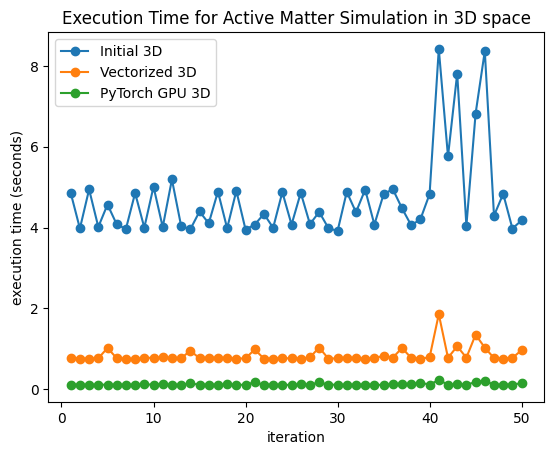

In [ ]:
# Initialize lists for the decorators
init3D_runtime = []
vec3D_runtime = []
py3D_runtime = []

# Execute for 50 iterations and compute the mean runtime
for i in range(50):
  init_3D(200, 500)
  vectorized_3D(200, 500)
  pytorch_3D(200, 500)

print(f"Mean execution of Initial implementation in 3D space: {sum(init3D_runtime)/len(init3D_runtime)} seconds")
print(f"Mean execution of Vectorized implementation in 3D space: {sum(vec3D_runtime)/len(vec3D_runtime)} seconds")
print(f"Mean execution of PyTorch implementation in 3D space: {sum(py3D_runtime)/len(py3D_runtime)} seconds")
print()
print(f"Standard deviation of Initial implementation in 3D space: {statistics.stdev(init3D_runtime)} seconds")
print(f"Standard deviation of Vectorized implementation in 3D space: {statistics.stdev(vec3D_runtime)} seconds")
print(f"Standard deviation of PyTorch implementation in 3D space: {statistics.stdev(py3D_runtime)} seconds")
print()


# Plotting
plt.figure()
plt.plot(range(1, 51), init3D_runtime, marker='o', label='Initial 3D')
plt.plot(range(1, 51), vec3D_runtime, marker='o', label='Vectorized 3D')
plt.plot(range(1, 51), py3D_runtime, marker='o', label='PyTorch GPU 3D')

plt.xlabel('iteration')
plt.ylabel('execution time (seconds)')
plt.title('Execution Time for Active Matter Simulation in 3D space')
plt.legend()
plt.savefig('execution_time_plot_3D.png')
plt.show()

###3D Profiling

In [ ]:
%lprun -f init_3D init_3D(200, 500)

In [ ]:
%lprun -f vectorized_3D vectorized_3D(200, 500)

In [ ]:
%memit init_3D(200, 500)

peak memory: 650.51 MiB, increment: 0.45 MiB


In [ ]:
%memit vectorized_3D(200, 500)

peak memory: 660.54 MiB, increment: 9.98 MiB


In [ ]:
import GPUtil
from threading import Thread
import time

py_runtime = []

class Monitor(Thread):
    def __init__(self, delay):
        super(Monitor, self).__init__()
        self.stopped = False
        self.delay = delay # Time between calls to GPUtil
        self.start()

    def run(self):
        while not self.stopped:
            gpus = GPUtil.getGPUs()
            GPUtil.showUtilization()
            print()
            for i, gpu in enumerate(gpus):
              print(f"Name: {gpu.name}")
              print(f"GPU ID: {gpu.id}")
              print(f"GPU Memory Used: {gpu.memoryUsed} MB")
              print(f"GPU Memory Utilization: {gpu.memoryUtil * 100}%")
              print(f"GPU Load: {gpu.load * 100}%")
              print()
            time.sleep(self.delay)

    def stop(self):
        self.stopped = True

# Instantiate monitor with a 1-second delay between updates
monitor = Monitor(2)

pytorch_3D(200, 500)

# Close monitor
monitor.stop()

| ID | GPU | MEM |
------------------
|  0 |  2% |  1% |

Name: Tesla T4
GPU ID: 0
GPU Memory Used: 127.0 MB
GPU Memory Utilization: 0.8268229166666666%
GPU Load: 2.0%



###Further examinations

Initial vs Init 3D: 2.7116609432400582 - 4.187092133939968
Vectorized vs Vectorized 3D: 0.4641887671399854 - 0.8348217406798903
PyTorch vs PyTorch 3D: 0.07289651753992075 - 0.13119122048003193



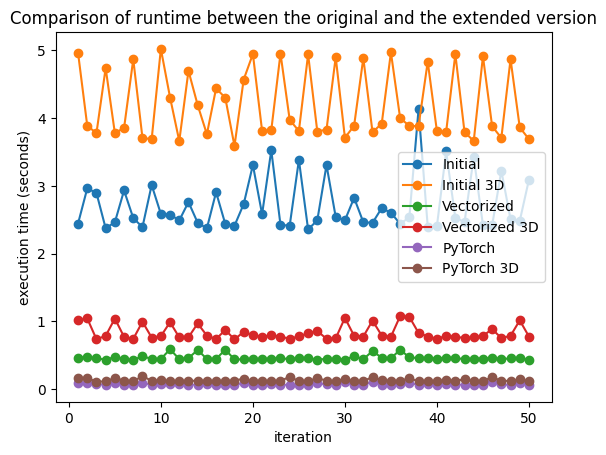

In [ ]:
# Initialize lists for the decorators
init_runtime = []
init3D_runtime = []
vec_runtime = []
vec3D_runtime = []
py_runtime = []
py3D_runtime = []

# Execute for 50 iterations and compute the mean runtime
for i in range(50):
  init(200, 500)
  init_3D(200, 500)
  vectorized(200, 500)
  vectorized_3D(200, 500)
  pytorch(200, 500)
  pytorch_3D(200, 500)

print(f"Initial vs Init 3D: {sum(init_runtime)/len(init_runtime)} - {sum(init3D_runtime)/len(init3D_runtime)}")
print(f"Vectorized vs Vectorized 3D: {sum(vec_runtime)/len(vec_runtime)} - {sum(vec3D_runtime)/len(vec3D_runtime)}")
print(f"PyTorch vs PyTorch 3D: {sum(py_runtime)/len(py_runtime)} - {sum(py3D_runtime)/len(py3D_runtime)}")
print()

# Plotting
plt.figure()
plt.plot(range(1, 51), init_runtime, marker='o', label='Initial')
plt.plot(range(1, 51), init3D_runtime, marker='o', label='Initial 3D')
plt.plot(range(1, 51), vec_runtime, marker='o', label='Vectorized')
plt.plot(range(1, 51), vec3D_runtime, marker='o', label='Vectorized 3D')
plt.plot(range(1, 51), py_runtime, marker='o', label='PyTorch')
plt.plot(range(1, 51), py3D_runtime, marker='o', label='PyTorch 3D')

plt.xlabel('iteration')
plt.ylabel('execution time (seconds)')
plt.title('Comparison of runtime between the original and the extended version')
plt.legend()
plt.savefig('origianl_vs_3D.png')
plt.show()